In [37]:
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from  pandas_profiling import ProfileReport
from mpl_toolkits.mplot3d import Axes3D 

bonds = pd.read_csv('./bond_similarity/bond_similarity.csv')

# profile = ProfileReport(bonds, title='Pandas Profiling Report', html={'style':{'full_width':True}})
# profile.to_file(output_file="your_report.html")



In [58]:


bonds.Country = pd.Categorical(bonds.Country)
bonds.Country

bonds['code'] = bonds.Country.cat.codes
set(zip(bonds.Country, bonds['code']))
# codes = bonds.Country.astype('category').cat.codes

{('AE', 0),
 ('AT', 1),
 ('AU', 2),
 ('BE', 3),
 ('CA', 4),
 ('CASH', 5),
 ('CH', 6),
 ('DE', 7),
 ('DK', 8),
 ('ES', 9),
 ('FI', 10),
 ('FR', 11),
 ('GB', 12),
 ('GG', 13),
 ('Gibraltar ', 14),
 ('HK', 15),
 ('IE', 16),
 ('IM', 17),
 ('IT', 18),
 ('JE', 19),
 ('JP', 20),
 ('KR', 21),
 ('KY', 22),
 ('LU', 23),
 ('MX', 24),
 ('NL', 25),
 ('NO', 26),
 ('NZ', 27),
 ('Netherlands', 28),
 ('PT', 29),
 ('RU', 30),
 ('SE', 31),
 ('SG', 32),
 ('US', 33),
 ('XB', 34),
 ('ZA', 35)}

Num rows 1148
[[ 115.87791269  799.520625     16.63125   ]
 [ 113.32238581  253.20452174   14.57809984]
 [ 115.6627275  1445.6175       20.05      ]
 [ 117.89623333 3457.36666667    7.        ]
 [ 111.87577207  472.9132716    15.95679012]]
cent a [115.87791269 113.32238581 115.6627275  117.89623333 111.87577207]
cent b [ 799.520625    253.20452174 1445.6175     3457.36666667  472.9132716 ]


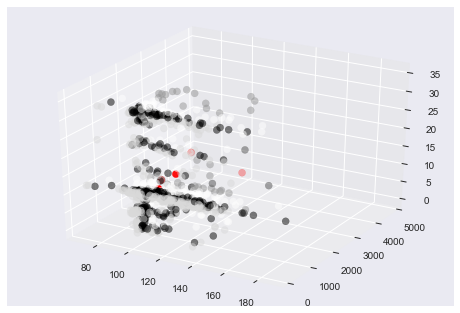

In [54]:
df = DataFrame(bonds,columns=['Price', 'Face Value', 'code'])
df = df.dropna()


print('Num rows', len(df['Price']))


# Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
#         'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
#        }


kmeans = KMeans(n_clusters=5).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)
print('cent a', centroids[:, 0])
print('cent b',  centroids[:, 1])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Price'], df['Face Value'], df['code'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', s=50)
# plt.show()

